### Importing Libraries

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Checking Working Directories

In [212]:
import os
print(os.getcwd())

C:\Users\Obinna J. Duruiheme\Predictive Analysis on WikiHow Dataset\Notebook


In [213]:
print(os.listdir())

['.ipynb_checkpoints', 'correlation_matrix_heatmap.png', 'Predictive Analysis On WikiHow Dataset.ipynb']


### Loading Dataset

In [214]:
df = pd.read_csv("../Data/wikihow.csv")

### Dataset Exploration

In [215]:
df.head(4)

,character_count,word_count,method_count,mean_method_size,mean_paragraph_size,size_largest_method,size_shortest_method,std_method_size,step_count,mean_steps_per_method,...,Kincaid,ARI,Coleman_Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,percent_helpful
0,7107,1508,2,3357.500000,379.823529,4321,2394,963.500000,16,8.000000,...,7.523760,8.159750,9.908877,67.453457,10.820887,36.866542,10.376433,3.264706,10.086871,78
1,5180,1176,2,2419.500000,317.000000,3171,1668,751.500000,14,7.000000,...,4.951055,5.505902,7.708411,81.614246,8.897157,33.807519,9.052403,2.652632,9.111023,99
2,3822,902,3,1114.333333,263.333333,1521,881,288.598144,11,3.666667,...,6.020412,6.727450,7.309495,81.109399,9.797251,31.810200,9.310165,2.527273,8.038576,88
3,11614,2429,3,3604.333333,393.111111,4148,2832,561.058721,26,8.666667,...,7.798307,8.728719,10.376311,66.362137,11.577962,38.743177,10.914639,3.584906,9.965255,82


In [216]:
df.tail(4)

,character_count,word_count,method_count,mean_method_size,mean_paragraph_size,size_largest_method,size_shortest_method,std_method_size,step_count,mean_steps_per_method,...,Kincaid,ARI,Coleman_Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,percent_helpful
19913,7580,1755,3,2484.333333,485.133333,2855,1863,442.071890,14,4.666667,...,5.962187,6.890179,7.740318,80.733444,9.777830,33.390443,9.374666,2.781818,8.593526,97
19914,6964,1638,2,3352.000000,221.035714,4970,1734,1618.000000,27,13.500000,...,4.103634,4.752583,6.795151,87.577331,8.052079,26.784654,8.373284,1.781955,9.028706,89
19915,5286,1368,6,817.666667,369.666667,1319,369,325.813682,11,1.833333,...,5.550322,5.769605,5.275409,87.329474,10.182456,30.134503,9.345326,2.184211,9.827261,100
19916,15942,3833,4,3878.000000,558.555556,4209,3090,456.883464,26,6.500000,...,6.218459,7.032255,6.987021,82.085750,10.427133,33.138013,9.656242,2.731481,7.915249,100


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19917 entries, 0 to 19916
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   character_count                   19917 non-null  int64  
 1   word_count                        19917 non-null  int64  
 2   method_count                      19917 non-null  int64  
 3   mean_method_size                  19917 non-null  float64
 4   mean_paragraph_size               19917 non-null  float64
 5   size_largest_method               19917 non-null  int64  
 6   size_shortest_method              19917 non-null  int64  
 7   std_method_size                   19917 non-null  float64
 8   step_count                        19917 non-null  int64  
 9   mean_steps_per_method             19917 non-null  float64
 10  introduction_size                 19917 non-null  int64  
 11  summary_size                      19917 non-null  int64  
 12  refe

In [218]:
df.shape

(19917, 45)

In [219]:
df.nunique()

character_count                      8630
word_count                           3017
method_count                           22
mean_method_size                    11012
mean_paragraph_size                 16372
size_largest_method                  4850
size_shortest_method                 3323
std_method_size                     17398
step_count                             61
mean_steps_per_method                 189
introduction_size                     701
summary_size                          766
references_count                       81
references_count_per_text_length    16288
references_count_per_method           261
image_count                            62
image_count_per_method                206
num_votes                             539
is_expert                               2
views                               19124
co_authors                            288
warnings                               17
tips                                   39
to_be_verb                        

### Exploratory Data Analysis

**Visualizing character_count, word_count, and method_count**

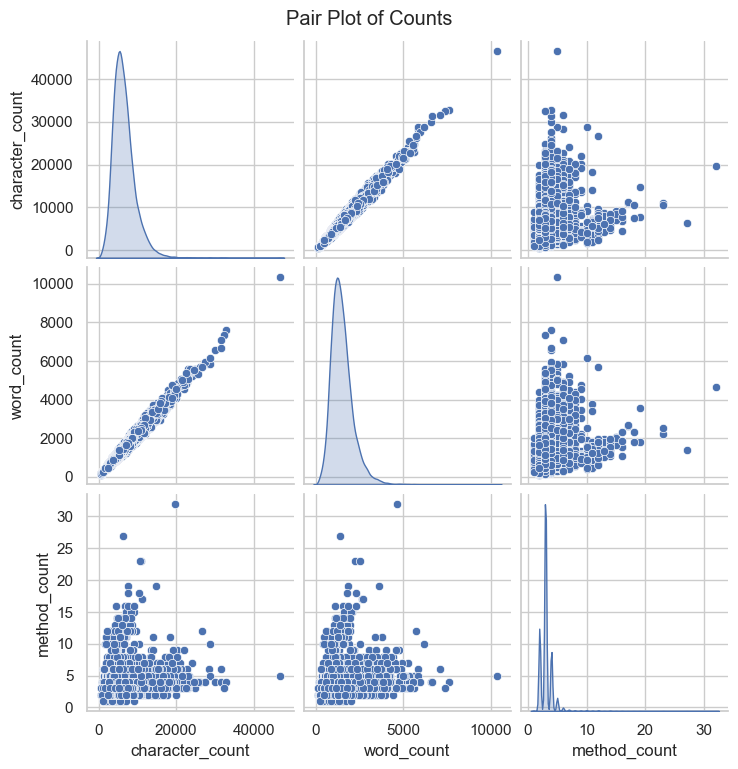

In [220]:
data_to_plot = df[['character_count', 'word_count', 'method_count']].melt(var_name='Count Type', value_name='Count')

# Set the style for the plot
sns.set(style="whitegrid")

sns.pairplot(df[['character_count', 'word_count', 'method_count']], diag_kind='kde')
plt.suptitle('Pair Plot of Counts', y=1.02)
plt.show()

**Visualizing mean_method_size and mean_paragraph_size**

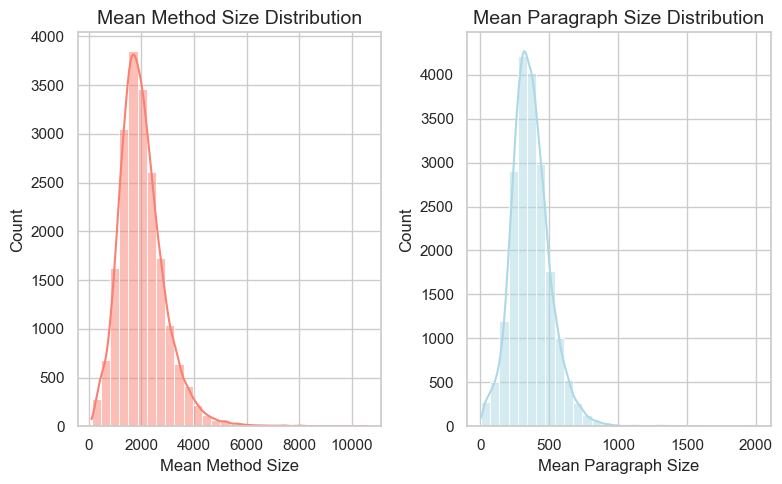

In [221]:
plt.figure(figsize=(8, 5))

# Histogram for mean_method_size
plt.subplot(1, 2, 1)
sns.histplot(df['mean_method_size'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Mean Method Size Distribution', fontsize=14)
plt.xlabel('Mean Method Size', fontsize=12)

# Histogram for mean_paragraph_size
plt.subplot(1, 2, 2)
sns.histplot(df['mean_paragraph_size'].dropna(), bins=30, kde=True, color='lightblue')
plt.title('Mean Paragraph Size Distribution', fontsize=14)
plt.xlabel('Mean Paragraph Size', fontsize=12)

plt.tight_layout()
plt.show()

**Visualizing size_largest_method, size_shortest_method, and std_method_size**

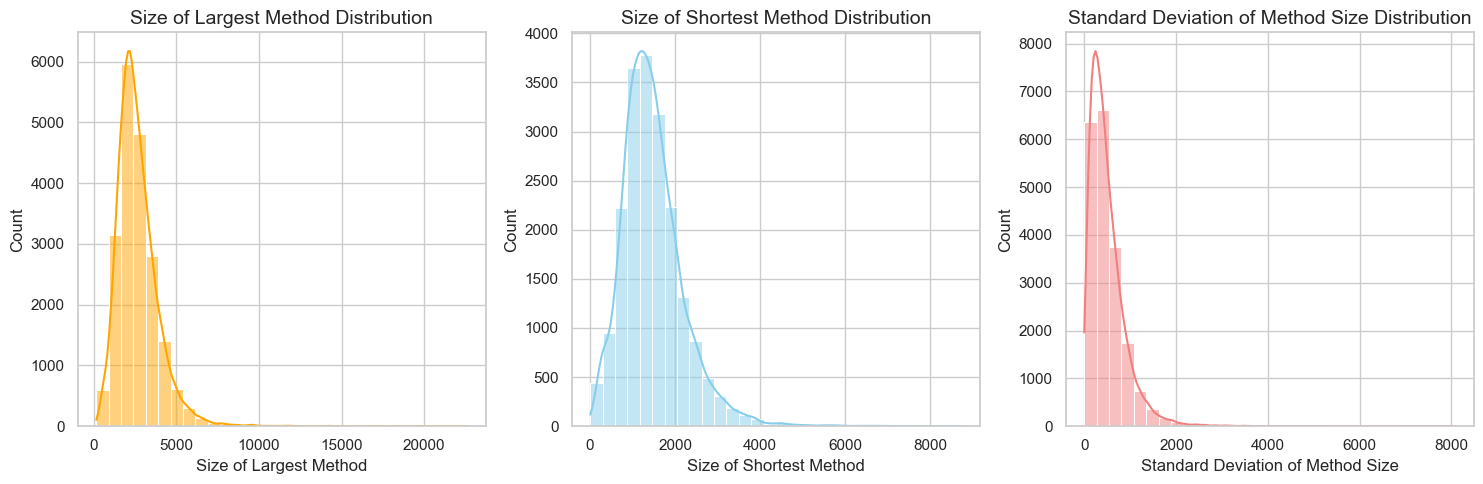

In [222]:
plt.figure(figsize=(15, 5))

# Histogram for size_largest_method
plt.subplot(1, 3, 1)
sns.histplot(df['size_largest_method'].dropna(), bins=30, kde=True, color='orange')
plt.title('Size of Largest Method Distribution', fontsize=14)
plt.xlabel('Size of Largest Method', fontsize=12)

# Histogram for size_shortest_method
plt.subplot(1, 3, 2)
sns.histplot(df['size_shortest_method'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Size of Shortest Method Distribution', fontsize=14)
plt.xlabel('Size of Shortest Method', fontsize=12)

# Histogram for std_method_size
plt.subplot(1, 3, 3)
sns.histplot(df['std_method_size'].dropna(), bins=30, kde=True, color='lightcoral')
plt.title('Standard Deviation of Method Size Distribution', fontsize=14)
plt.xlabel('Standard Deviation of Method Size', fontsize=12)

plt.tight_layout()
plt.show()

**Visualizing sentence_beginning_pronoun, sentence_beginning_interrogative, sentence_beginning_article, sentence_beginning_subordination, sentence_beginning_conjunction, and sentence_beginning_preposition**

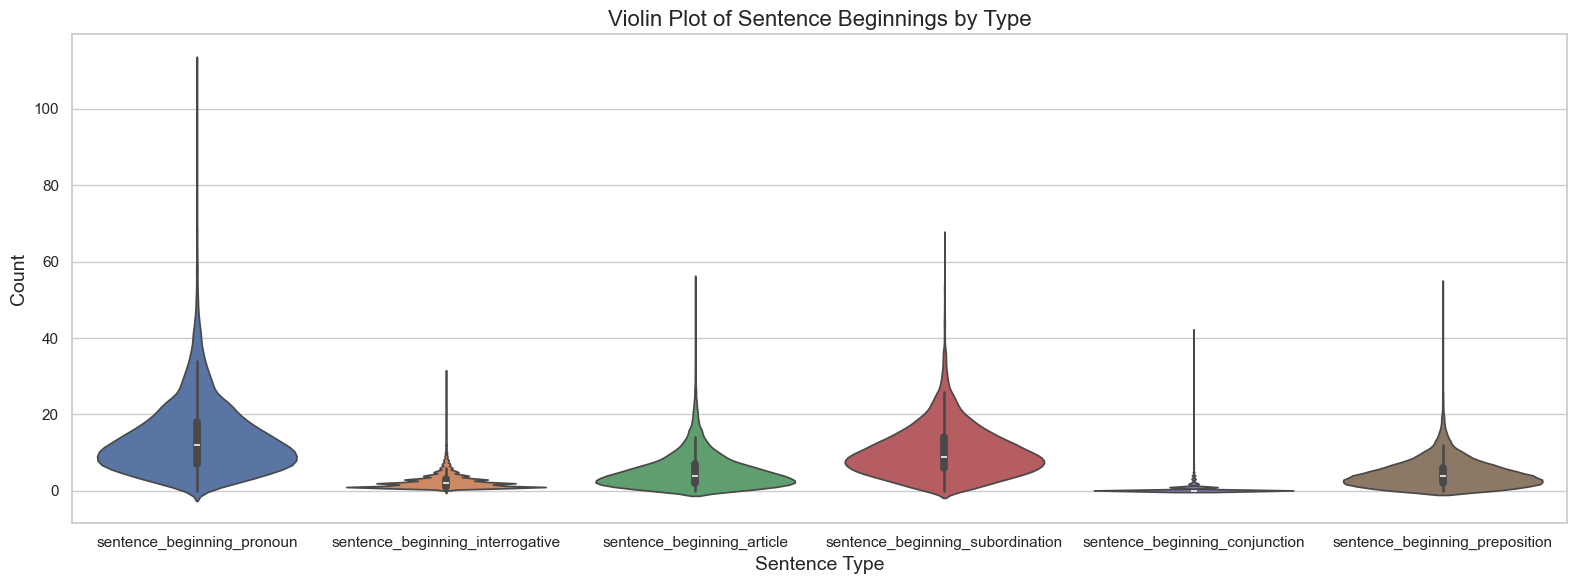

In [223]:
# Prepare data for violin plot
data_to_plot = df[['sentence_beginning_pronoun', 'sentence_beginning_interrogative',
                   'sentence_beginning_article', 'sentence_beginning_subordination',
                   'sentence_beginning_conjunction', 'sentence_beginning_preposition']].melt(var_name='Sentence Type', value_name='Count')

plt.figure(figsize=(16, 6))
sns.violinplot(x='Sentence Type', y='Count', data=data_to_plot, hue='Sentence Type', legend=False)
plt.title('Violin Plot of Sentence Beginnings by Type', fontsize=16)
plt.xlabel('Sentence Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Visualizing  image_count and image_count_per_method**

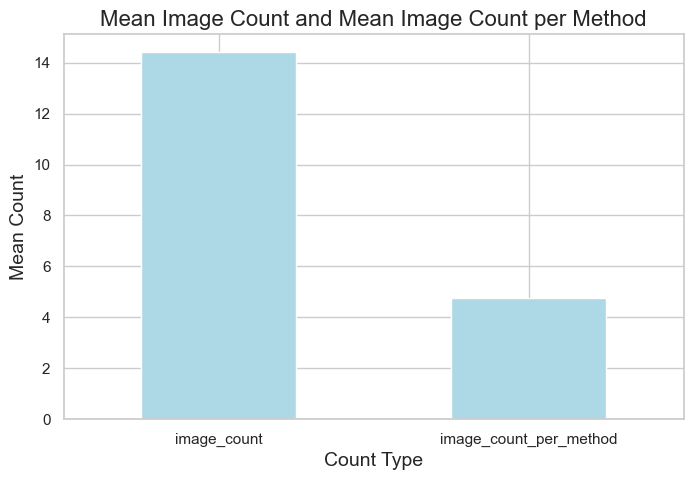

In [224]:
# Calculate mean values for each count type
mean_values = df[['image_count', 'image_count_per_method']].mean()

# Create bar plot
plt.figure(figsize=(8, 5))
mean_values.plot(kind='bar', color='lightblue')
plt.title('Mean Image Count and Mean Image Count per Method', fontsize=16)
plt.xlabel('Count Type', fontsize=14)
plt.ylabel('Mean Count', fontsize=14)
plt.xticks(rotation=0)
plt.show()

## Data Cleaning ##

**Checking for missing values in the dataset**

In [225]:
df.isnull().sum()

character_count                       0
word_count                            0
method_count                          0
mean_method_size                      0
mean_paragraph_size                   0
size_largest_method                   0
size_shortest_method                  0
std_method_size                       0
step_count                            0
mean_steps_per_method                 0
introduction_size                     0
summary_size                          0
references_count                    926
references_count_per_text_length    926
references_count_per_method         926
image_count                           0
image_count_per_method                0
num_votes                             0
is_expert                             0
views                                96
co_authors                           96
warnings                              0
tips                                  0
to_be_verb                            0
aux_verb                              0


**Visualizing the missing data**

In [226]:
df.references_count.nunique()

81

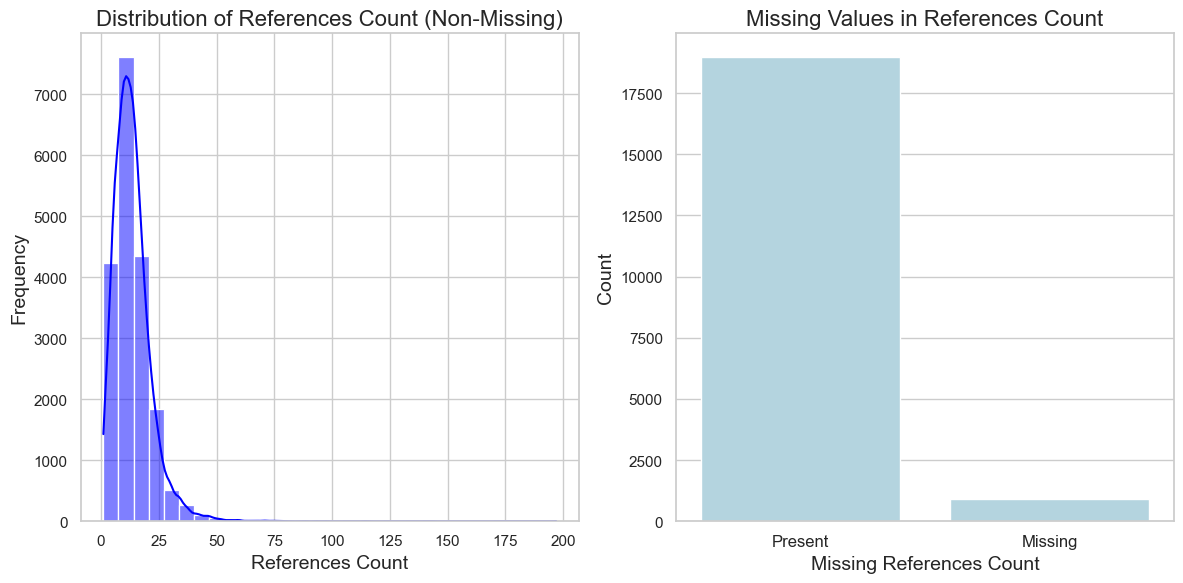

In [227]:

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for non-missing references_count
plt.subplot(1, 2, 1)
sns.histplot(df['references_count'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of References Count (Non-Missing)', fontsize=16)
plt.xlabel('References Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Bar plot for missing values
plt.subplot(1, 2, 2)
missing_count = df['references_count'].isnull().value_counts()
sns.barplot(x=missing_count.index, y=missing_count.values, color='lightblue')
plt.title('Missing Values in References Count', fontsize=16)
plt.xlabel('Missing References Count', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Present', 'Missing'], fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

In [228]:
# Calculate the mode for the 'references_count' column
mode_value = df['references_count'].mode()[0]

# Fill NaN values with the mode and assign back to the column
df['references_count'] = df['references_count'].fillna(mode_value)

In [229]:
df.references_count_per_text_length.nunique()

16288

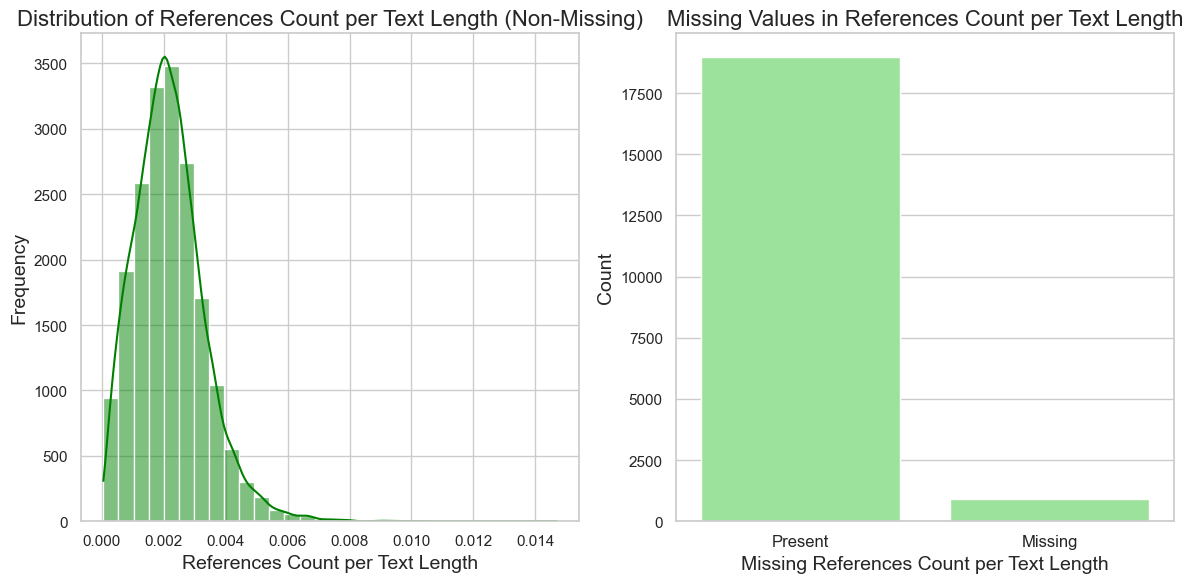

In [230]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for non-missing references_count_per_text_length
plt.subplot(1, 2, 1)
sns.histplot(df['references_count_per_text_length'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of References Count per Text Length (Non-Missing)', fontsize=16)
plt.xlabel('References Count per Text Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Bar plot for missing values
plt.subplot(1, 2, 2)
missing_count = df['references_count_per_text_length'].isnull().value_counts()
sns.barplot(x=missing_count.index, y=missing_count.values, color='lightgreen')
plt.title('Missing Values in References Count per Text Length', fontsize=16)
plt.xlabel('Missing References Count per Text Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Present', 'Missing'], fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

In [231]:
# Calculate the median for the 'references_count_per_text_length' column
median_value = df['references_count_per_text_length'].median()

# Fill NaN values with the calculated median and assign back to the column
df['references_count_per_text_length'] = df['references_count_per_text_length'].fillna(median_value)

In [232]:
df.references_count_per_method.nunique()

261

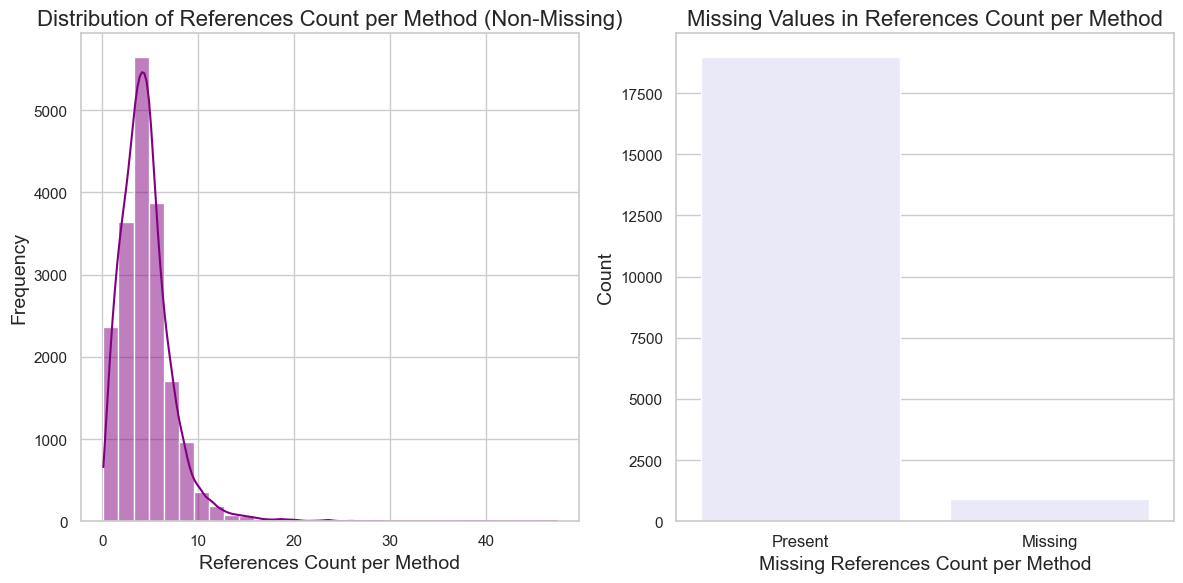

In [233]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for non-missing references_count_per_method
plt.subplot(1, 2, 1)
sns.histplot(df['references_count_per_method'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of References Count per Method (Non-Missing)', fontsize=16)
plt.xlabel('References Count per Method', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Bar plot for missing values
plt.subplot(1, 2, 2)
missing_count = df['references_count_per_method'].isnull().value_counts()
sns.barplot(x=missing_count.index, y=missing_count.values, color='lavender')
plt.title('Missing Values in References Count per Method', fontsize=16)
plt.xlabel('Missing References Count per Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Present', 'Missing'], fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

In [234]:
# Calculate the median for the 'references_count_per_method' column
median_value_2 = df['references_count_per_method'].median()

# Fill NaN values with the calculated median and assign back to the column
df['references_count_per_method'] = df['references_count_per_method'].fillna(median_value_2)

In [235]:
df.views.nunique()

19124

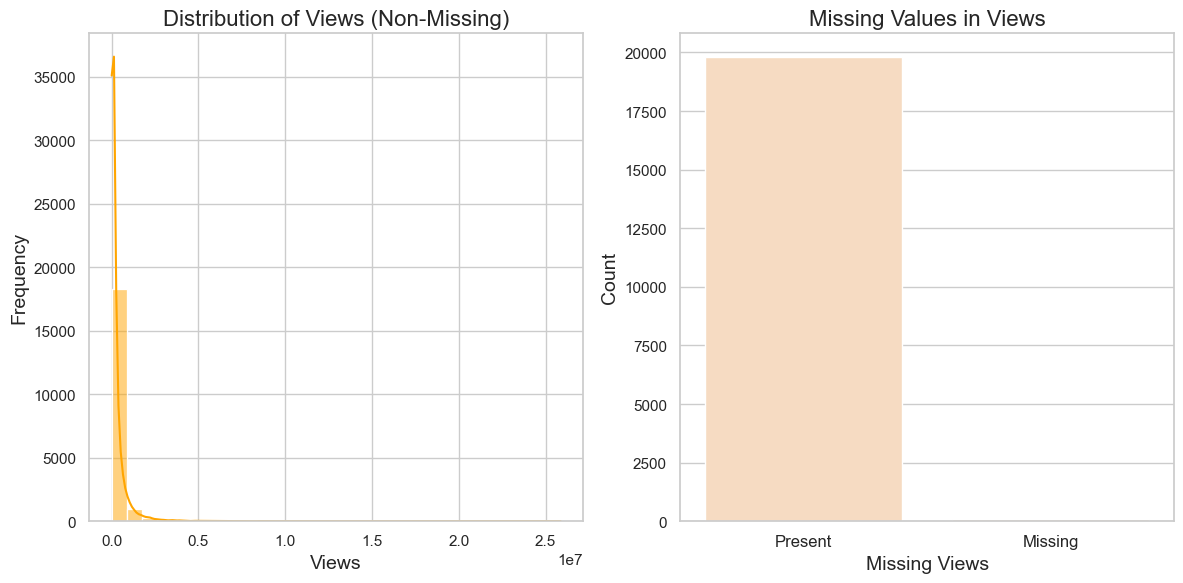

In [236]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for non-missing views
plt.subplot(1, 2, 1)
sns.histplot(df['views'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Views (Non-Missing)', fontsize=16)
plt.xlabel('Views', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Bar plot for missing values
plt.subplot(1, 2, 2)
missing_count = df['views'].isnull().value_counts()
sns.barplot(x=missing_count.index, y=missing_count.values, color='peachpuff')
plt.title('Missing Values in Views', fontsize=16)
plt.xlabel('Missing Views', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Present', 'Missing'], fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

In [237]:
# Calculate the median for the 'views' column
median_value_3 = df['views'].median()

# Fill NaN values with the calculated median and assign back to the column
df['views'] = df['views'].fillna(median_value_3)

In [238]:
df.co_authors.nunique()

288

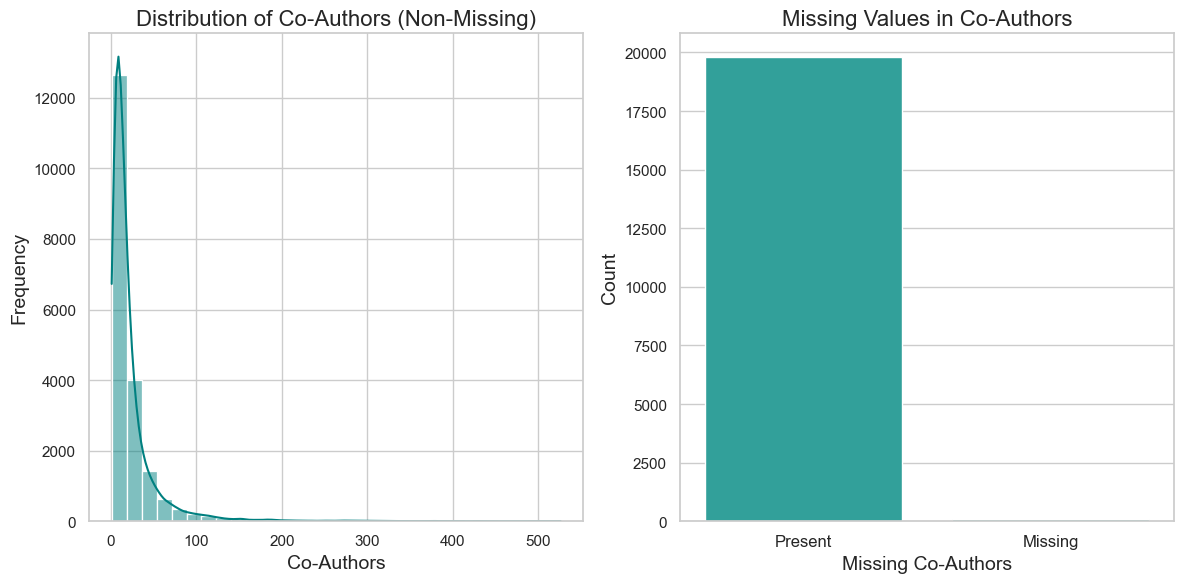

In [239]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for non-missing co_authors
plt.subplot(1, 2, 1)
sns.histplot(df['co_authors'].dropna(), bins=30, kde=True, color='teal')
plt.title('Distribution of Co-Authors (Non-Missing)', fontsize=16)
plt.xlabel('Co-Authors', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Bar plot for missing values
plt.subplot(1, 2, 2)
missing_count = df['co_authors'].isnull().value_counts()
sns.barplot(x=missing_count.index, y=missing_count.values, color='lightseagreen')
plt.title('Missing Values in Co-Authors', fontsize=16)
plt.xlabel('Missing Co-Authors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Present', 'Missing'], fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

In [240]:
# Calculate the median for the 'co_authors' column
median_value_4 = df['co_authors'].median()

# Fill NaN values with the calculated median and assign back to the column
df['co_authors'] = df['co_authors'].fillna(median_value_4)

In [241]:
df.isnull().sum()

character_count                     0
word_count                          0
method_count                        0
mean_method_size                    0
mean_paragraph_size                 0
size_largest_method                 0
size_shortest_method                0
std_method_size                     0
step_count                          0
mean_steps_per_method               0
introduction_size                   0
summary_size                        0
references_count                    0
references_count_per_text_length    0
references_count_per_method         0
image_count                         0
image_count_per_method              0
num_votes                           0
is_expert                           0
views                               0
co_authors                          0
warnings                            0
tips                                0
to_be_verb                          0
aux_verb                            0
conjunction                         0
pronoun     

In [242]:
df.corr()

,character_count,word_count,method_count,mean_method_size,mean_paragraph_size,size_largest_method,size_shortest_method,std_method_size,step_count,mean_steps_per_method,...,Kincaid,ARI,Coleman_Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,percent_helpful
character_count,1.000000,0.988764,0.282684,0.794190,0.698996,0.828598,0.589214,0.579474,0.541815,0.254914,...,0.425547,0.436732,0.333617,-0.355762,0.441046,0.414626,0.418059,0.421090,0.201903,0.014474
word_count,0.988764,1.000000,0.288452,0.782827,0.667653,0.815389,0.581864,0.567710,0.563880,0.277330,...,0.324147,0.341326,0.203557,-0.235662,0.352021,0.308273,0.317717,0.317806,0.115529,0.006774
method_count,0.282684,0.288452,1.000000,-0.214187,-0.035805,-0.091352,-0.296081,0.018580,0.451643,-0.290797,...,-0.023578,-0.032113,-0.000779,0.003184,-0.025194,-0.015076,-0.010819,-0.017049,-0.003942,0.012469
mean_method_size,0.794190,0.782827,-0.214187,1.000000,0.762631,0.921439,0.870765,0.563360,0.222027,0.461983,...,0.452434,0.472045,0.328627,-0.358113,0.473116,0.434336,0.435781,0.445227,0.211722,0.007221
mean_paragraph_size,0.698996,0.667653,-0.035805,0.762631,1.000000,0.718716,0.649067,0.448437,-0.139618,-0.148155,...,0.603722,0.613435,0.458236,-0.502171,0.612574,0.578425,0.575702,0.591085,0.312241,0.008495
size_largest_method,0.828598,0.815389,-0.091352,0.921439,0.718716,1.000000,0.648070,0.820605,0.310053,0.406030,...,0.430648,0.454832,0.324648,-0.344239,0.452494,0.421165,0.420025,0.432525,0.228211,0.003840
size_shortest_method,0.589214,0.581864,-0.296081,0.870765,0.649067,0.648070,1.000000,0.114329,0.082690,0.421472,...,0.382537,0.392329,0.264266,-0.299253,0.396675,0.358844,0.361542,0.367194,0.150100,0.009278
std_method_size,0.579474,0.567710,0.018580,0.563360,0.448437,0.820605,0.114329,1.000000,0.269782,0.235888,...,0.272876,0.299178,0.219948,-0.219374,0.291607,0.278003,0.273505,0.287399,0.187036,-0.003368
step_count,0.541815,0.563880,0.451643,0.222027,-0.139618,0.310053,0.082690,0.269782,1.000000,0.572694,...,-0.106171,-0.097085,-0.061228,0.084547,-0.089789,-0.088890,-0.076968,-0.087396,-0.066147,-0.006530
mean_steps_per_method,0.254914,0.277330,-0.290797,0.461983,-0.148155,0.406030,0.421472,0.235888,0.572694,1.000000,...,-0.117732,-0.098487,-0.105237,0.120817,-0.092361,-0.107605,-0.096557,-0.102282,-0.071508,-0.009412


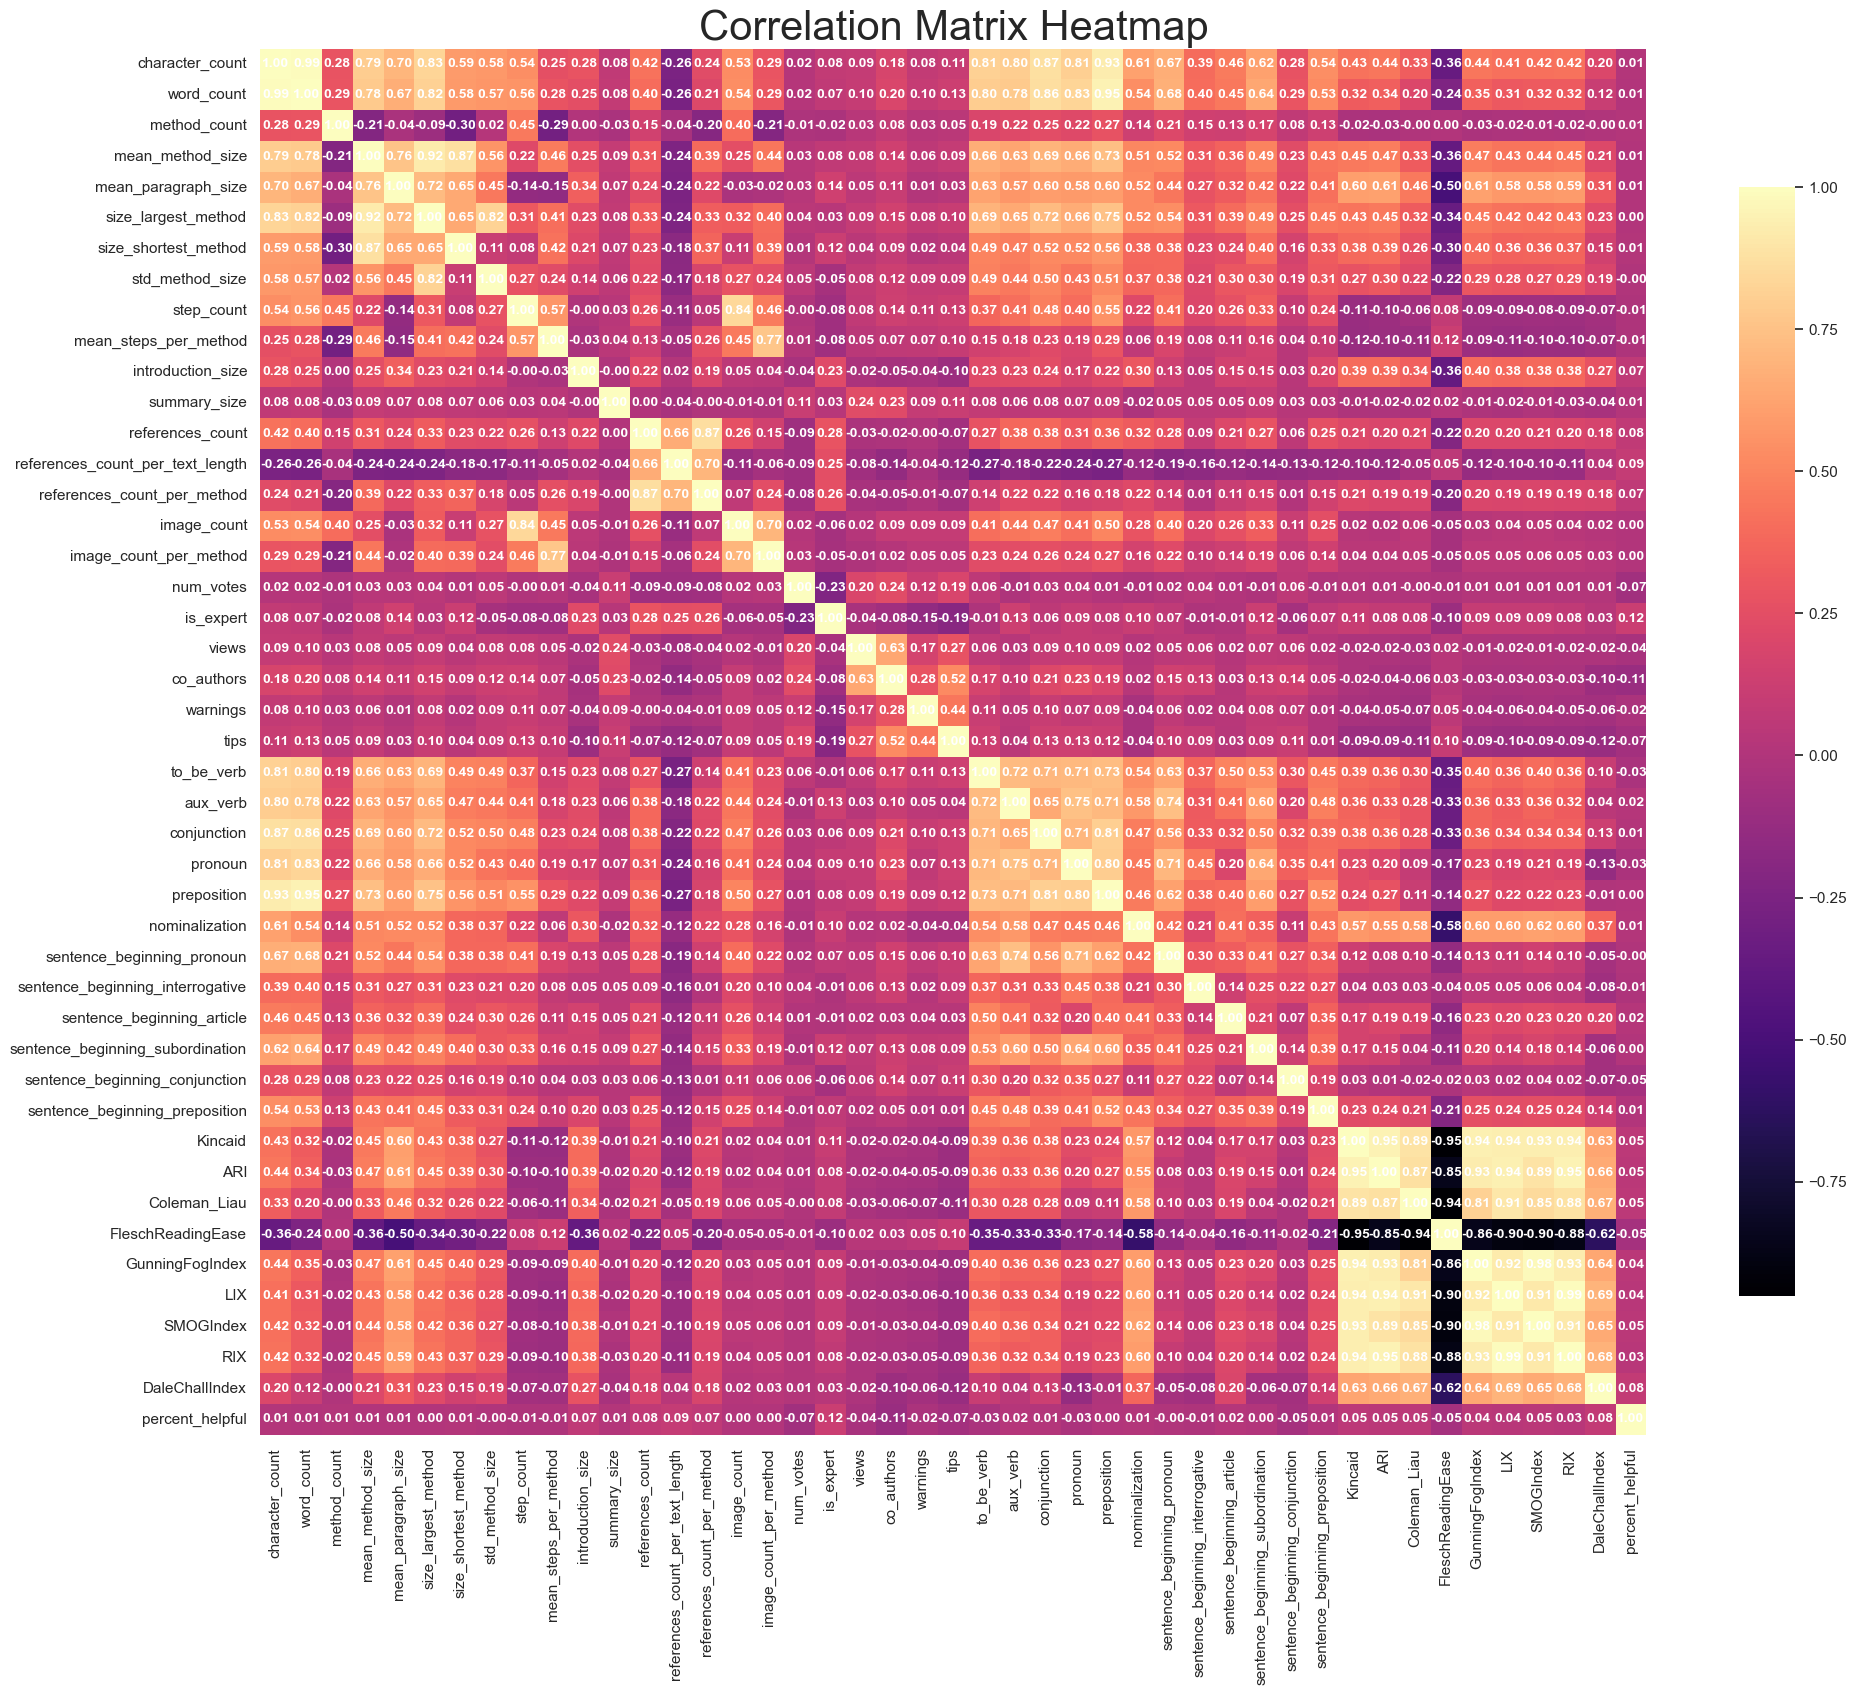

In [243]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(24, 18))  # Increase figure size

# Create a heatmap with a different color map and improved annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma',  # Change color map
            square=True, cbar_kws={"shrink": .8}, 
            annot_kws={"size": 10, "weight": "bold", "color": "white"})  # Make annotations bold and white

# Add titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=30)

# Show the plot
plt.show()

## Feature Engineering ##

**Engagement Ratios**

In [244]:
df['views_per_word'] = df['views'] / df['word_count']
df['votes_per_method'] = df['num_votes'] / df['method_count']
df['views_per_image'] = df['views'] / df['image_count']

In [245]:
df['views_per_word'].head(4) 

0     82.736074
1     65.790816
2    380.895787
3     18.181145
Name: views_per_word, dtype: float64

In [246]:
df['votes_per_method'].head(4)

0    15.000000
1     9.500000
2     4.000000
3    11.333333
Name: votes_per_method, dtype: float64

In [247]:
df['views_per_image'].head(4)

0     8911.857143
1     5526.428571
2    31233.454545
3     1698.538462
Name: views_per_image, dtype: float64

**Content Density Metrics**

In [248]:
df['method_density'] = df['method_count'] / df['word_count']
df['paragraph_density'] = df['mean_paragraph_size'] / df['word_count']

In [249]:
df['method_density'].head(4)

0    0.001326
1    0.001701
2    0.003326
3    0.001235
Name: method_density, dtype: float64

In [250]:
df['paragraph_density'].head(4)

0    0.251872
1    0.269558
2    0.291944
3    0.161841
Name: paragraph_density, dtype: float64

**Complexity Indices**

In [251]:
df['average_readability'] = (df['Kincaid'] + df['ARI'] + df['Coleman_Liau']) / 3
df['readability_variance'] = df[['Kincaid', 'ARI', 'Coleman_Liau']].std(axis=1)

In [252]:
df['average_readability'].head(4)

0    8.530796
1    6.055123
2    6.685786
3    8.967779
Name: average_readability, dtype: float64

In [253]:
df['readability_variance'].head(4)

0    1.235092
1    1.458419
2    0.645551
3    1.305522
Name: readability_variance, dtype: float64

**Method Characteristics**

In [254]:
df['average_method_size'] = df['mean_method_size'] / df['method_count']
df['largest_to_smallest_method_ratio'] = df['size_largest_method'] / df['size_shortest_method']

In [255]:
df['average_method_size'].head(4)

0    1678.750000
1    1209.750000
2     371.444444
3    1201.444444
Name: average_method_size, dtype: float64

In [256]:
df['largest_to_smallest_method_ratio'].head(4) 

0    1.804929
1    1.901079
2    1.726447
3    1.464689
Name: largest_to_smallest_method_ratio, dtype: float64

**Text Structure Features**

In [257]:
df['average_sentence_length'] = df['word_count'] / df['step_count']

In [258]:
df['average_sentence_length'].head(4)

0    94.250000
1    84.000000
2    82.000000
3    93.423077
Name: average_sentence_length, dtype: float64

**Visual Aid Metrics**

In [259]:
df['image_to_method_ratio'] = df['image_count'] / df['method_count']
df['image_effectiveness'] = df['views'] / df['image_count']

In [260]:
df['image_to_method_ratio'].head(4)

0    7.000000
1    7.000000
2    3.666667
3    8.666667
Name: image_to_method_ratio, dtype: float64

In [261]:
df['image_effectiveness'].head(4)

0     8911.857143
1     5526.428571
2    31233.454545
3     1698.538462
Name: image_effectiveness, dtype: float64

**Reference Metrics**

In [262]:
df['references_per_method'] = df['references_count'] / df['method_count']
df['references_per_word'] = df['references_count'] / df['word_count']

In [263]:
df['references_per_method'].head(4)

0    12.000000
1     8.000000
2     3.666667
3    10.333333
Name: references_per_method, dtype: float64

In [264]:
df['references_per_word'].head(4)

0    0.015915
1    0.013605
2    0.012195
3    0.012762
Name: references_per_word, dtype: float64

**Categorical Encodings**

In [265]:
df['is_expert_numeric'] = df['is_expert'].astype(int)

In [266]:
df['is_expert_numeric'].head(4)

0    1
1    1
2    1
3    1
Name: is_expert_numeric, dtype: int32

**Length Ratios**

In [267]:
df['introduction_to_body_ratio'] = df['introduction_size'] / (df['word_count'] - df['introduction_size'])
df['summary_to_body_ratio'] = df['summary_size'] / (df['word_count'] - df['summary_size'])

In [268]:
df['introduction_to_body_ratio'].head(4)

0    0.312446
1    0.348624
2    0.982418
3    0.457983
Name: introduction_to_body_ratio, dtype: float64

In [269]:
df['summary_to_body_ratio'].head(4)

0    0.523232
1    0.872611
2    2.256318
3    0.277077
Name: summary_to_body_ratio, dtype: float64

**Cumulative Metrics**

In [270]:
df['total_content_size'] = df['character_count'] + df['word_count'] + df['introduction_size'] + df['summary_size']
df['total_engagement'] = df['views'] + df['num_votes'] + df['percent_helpful']

In [271]:
df['total_content_size'].head(4)

0     9492
1     7208
2     5796
3    15333
Name: total_content_size, dtype: int64

In [272]:
df['total_engagement'].head(4)

0    124874.0
1     77488.0
2    343668.0
3     44278.0
Name: total_engagement, dtype: float64

**Checking DataFrame For Information On Newly Added Columns**

In [273]:
df.columns

Index(['character_count', 'word_count', 'method_count', 'mean_method_size',
       'mean_paragraph_size', 'size_largest_method', 'size_shortest_method',
       'std_method_size', 'step_count', 'mean_steps_per_method',
       'introduction_size', 'summary_size', 'references_count',
       'references_count_per_text_length', 'references_count_per_method',
       'image_count', 'image_count_per_method', 'num_votes', 'is_expert',
       'views', 'co_authors', 'warnings', 'tips', 'to_be_verb', 'aux_verb',
       'conjunction', 'pronoun', 'preposition', 'nominalization',
       'sentence_beginning_pronoun', 'sentence_beginning_interrogative',
       'sentence_beginning_article', 'sentence_beginning_subordination',
       'sentence_beginning_conjunction', 'sentence_beginning_preposition',
       'Kincaid', 'ARI', 'Coleman_Liau', 'FleschReadingEase',
       'GunningFogIndex', 'LIX', 'SMOGIndex', 'RIX', 'DaleChallIndex',
       'percent_helpful', 'views_per_word', 'votes_per_method',
       'vi

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19917 entries, 0 to 19916
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   character_count                   19917 non-null  int64  
 1   word_count                        19917 non-null  int64  
 2   method_count                      19917 non-null  int64  
 3   mean_method_size                  19917 non-null  float64
 4   mean_paragraph_size               19917 non-null  float64
 5   size_largest_method               19917 non-null  int64  
 6   size_shortest_method              19917 non-null  int64  
 7   std_method_size                   19917 non-null  float64
 8   step_count                        19917 non-null  int64  
 9   mean_steps_per_method             19917 non-null  float64
 10  introduction_size                 19917 non-null  int64  
 11  summary_size                      19917 non-null  int64  
 12  refe